In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import ds_utils plotting functions
from ds_utils.plotting import (
    apply_corporate_style,
    plot_line,
    plot_scatter,
    plot_bar,
    plot_time_series,
    plot_histogram,
    plot_density,
    plot_boxplot,
    plot_violin,
    get_color_palette,
    save_plot,
)

# Apply corporate styling globally
apply_corporate_style()

C:\projects\utils\src\ds_utils\cleaning\validation.py:196: SyntaxWarning: invalid escape sequence '\w'
  >>> schema = create_string_schema('email', pattern=r'^[\w\.-]+@[\w\.-]+\.\w+$')


{'font.family': 'DejaVu Sans',
 'font.size': 12,
 'axes.titlesize': 14,
 'axes.labelsize': 12,
 'xtick.labelsize': 10,
 'ytick.labelsize': 10,
 'legend.fontsize': 10,
 'axes.grid': True,
 'grid.linestyle': '--',
 'grid.alpha': 0.3,
 'grid.color': '#cccccc',
 'axes.spines.top': False,
 'axes.spines.right': False,
 'figure.facecolor': 'white',
 'axes.facecolor': 'white',
 'savefig.facecolor': 'white'}

## 1. Create Sample Data

In [2]:
# Generate sample data
np.random.seed(42)

# Time series data
dates = pd.date_range('2024-01-01', periods=100, freq='D')
ts_data = pd.DataFrame({
    'date': dates,
    'sales': np.cumsum(np.random.randn(100)) + 100,
    'revenue': np.cumsum(np.random.randn(100)) * 1000 + 50000,
})

# Categorical data
cat_data = pd.DataFrame({
    'category': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'value': [23, 45, 56, 78, 32],
    'group': ['Group 1', 'Group 1', 'Group 2', 'Group 2', 'Group 1'],
})

# Distribution data
dist_data = pd.DataFrame({
    'normal': np.random.randn(500),
    'skewed': np.random.exponential(2, 500),
    'bimodal': np.concatenate([np.random.normal(-2, 1, 250), np.random.normal(2, 1, 250)]),
    'group': np.random.choice(['A', 'B', 'C'], 500),
})

print("Sample data created!")

Sample data created!


## 2. Line Plots

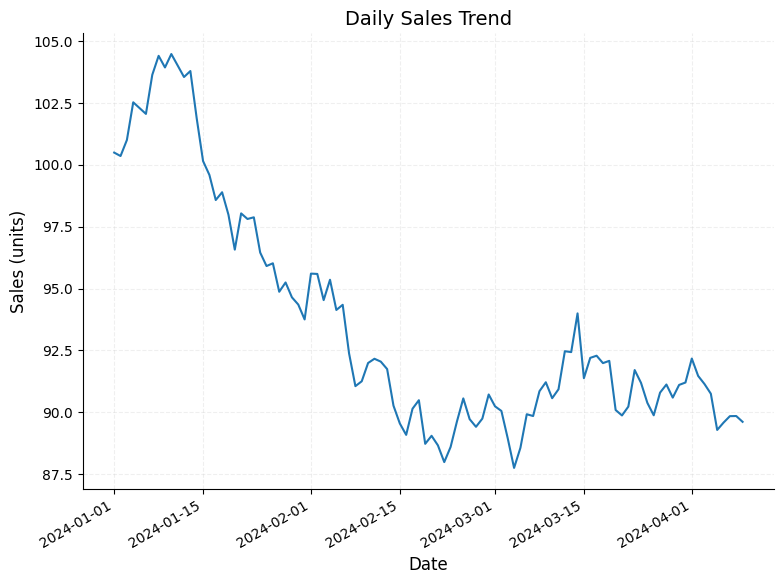

In [3]:
# Basic line plot
fig, ax = plot_line(
    ts_data, 
    x='date', 
    y='sales',
    title='Daily Sales Trend',
    xlabel='Date',
    ylabel='Sales (units)',
)
plt.show()

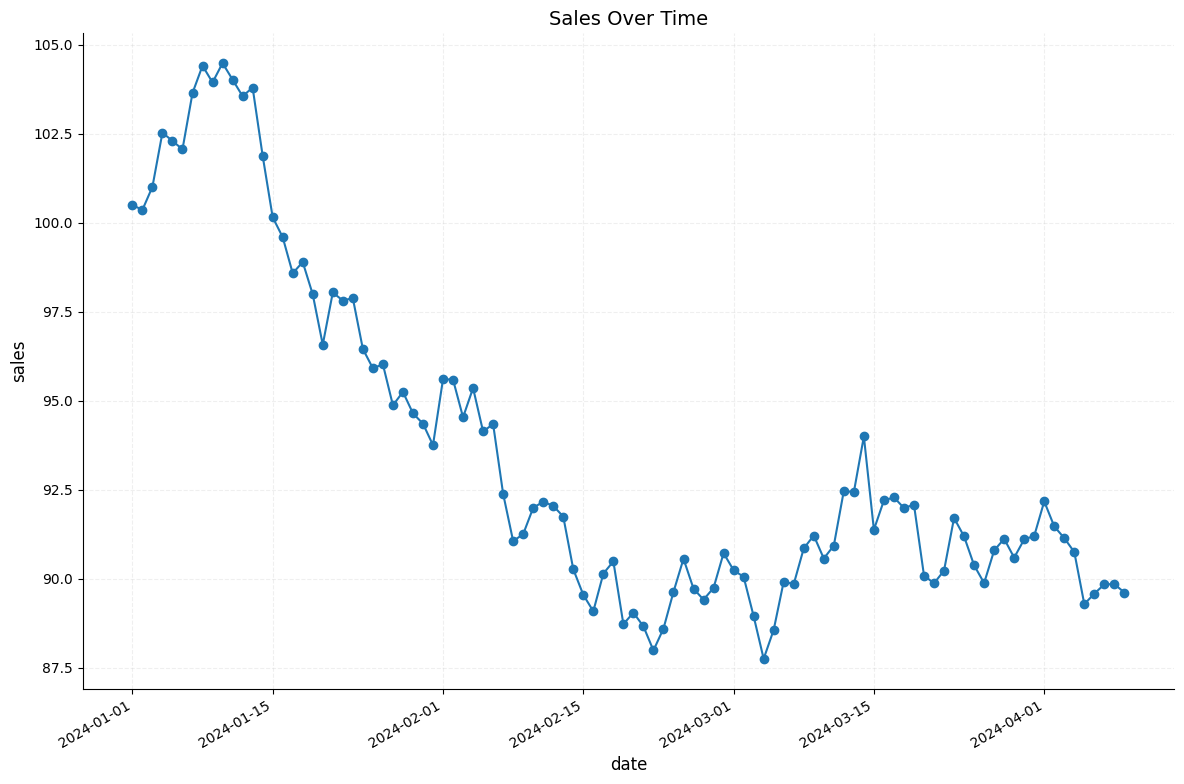

In [4]:
# Line plot with multiple series
fig, ax = plot_line(
    ts_data,
    x='date',
    y=['sales'],
    title='Sales Over Time',
    markers=True,
    figsize='large',
)
plt.show()

## 3. Scatter Plots

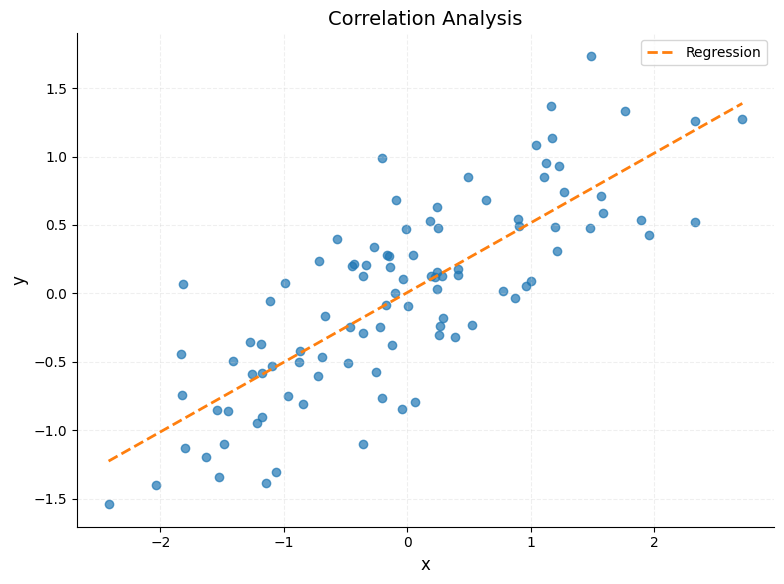

In [5]:
# Create scatter data
scatter_data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'size': np.random.randint(10, 100, 100),
    'category': np.random.choice(['A', 'B', 'C'], 100),
})
scatter_data['y'] = scatter_data['x'] * 0.5 + scatter_data['y'] * 0.5

# Basic scatter plot with regression
fig, ax = plot_scatter(
    scatter_data,
    x='x',
    y='y',
    title='Correlation Analysis',
    add_regression=True,
)
plt.show()

C:\projects\utils\src\ds_utils\plotting\standard.py:202: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


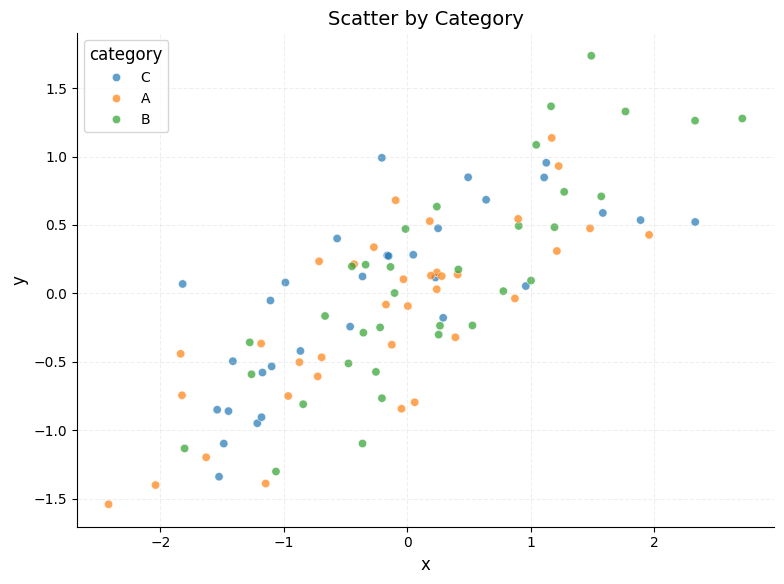

In [6]:
# Scatter plot with color grouping
fig, ax = plot_scatter(
    scatter_data,
    x='x',
    y='y',
    hue='category',
    title='Scatter by Category',
)
plt.show()

## 4. Bar Plots

C:\projects\utils\src\ds_utils\plotting\standard.py:305: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, ax=ax, color=colors[0], **plot_kwargs)
C:\projects\utils\src\ds_utils\plotting\standard.py:305: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=data, x=x, y=y, ax=ax, color=colors[0], **plot_kwargs)


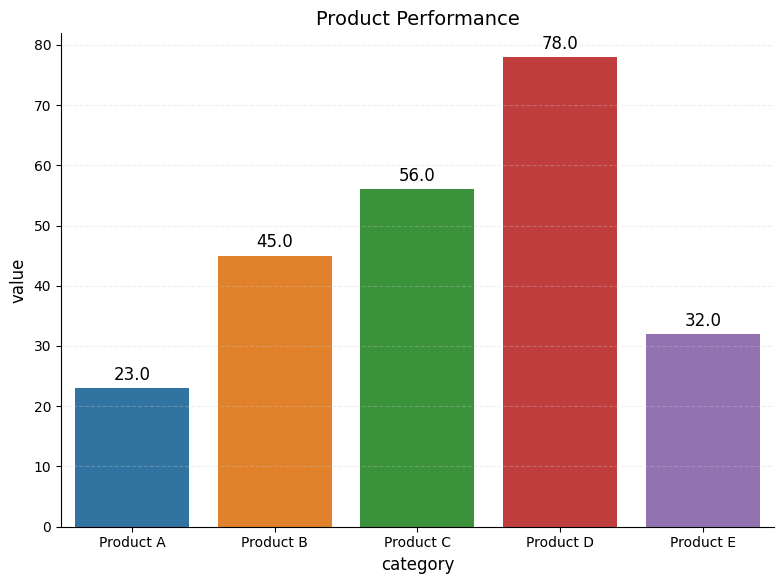

In [7]:
# Vertical bar plot
fig, ax = plot_bar(
    cat_data,
    x='category',
    y='value',
    title='Product Performance',
    show_values=True,
)
plt.show()

C:\projects\utils\src\ds_utils\plotting\standard.py:300: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, y=x, x=y, ax=ax, orient="h", color=colors[0], **plot_kwargs)
C:\projects\utils\src\ds_utils\plotting\standard.py:300: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=data, y=x, x=y, ax=ax, orient="h", color=colors[0], **plot_kwargs)


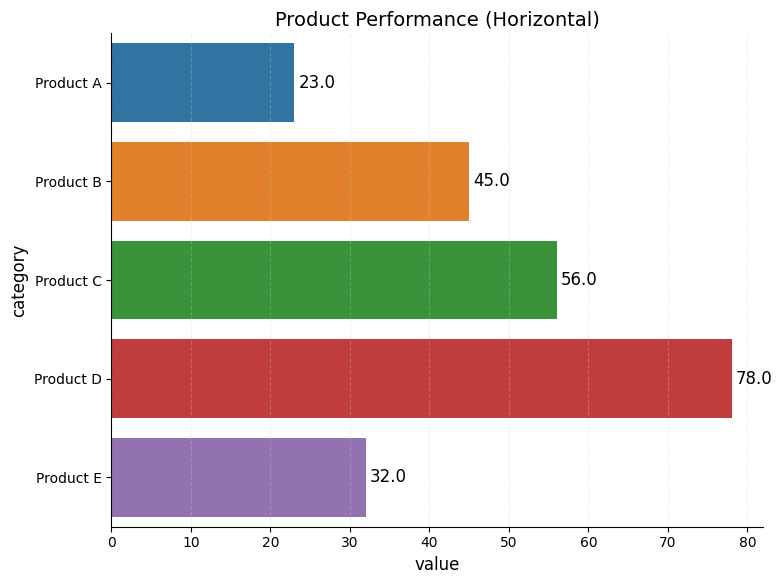

In [8]:
# Horizontal bar plot
fig, ax = plot_bar(
    cat_data,
    x='category',
    y='value',
    title='Product Performance (Horizontal)',
    orientation='horizontal',
    show_values=True,
)
plt.show()

## 5. Distribution Plots

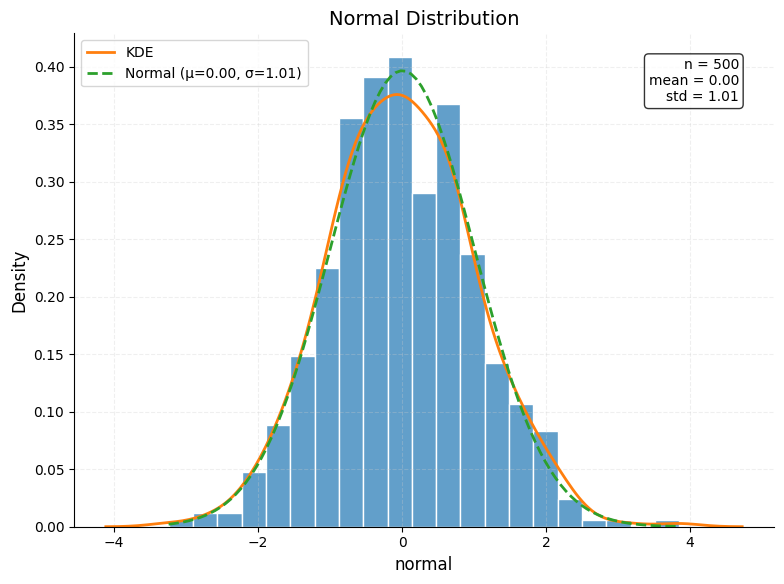

In [9]:
# Histogram with KDE
fig, ax = plot_histogram(
    dist_data,
    column='normal',
    title='Normal Distribution',
    add_kde=True,
    add_normal=True,
)
plt.show()

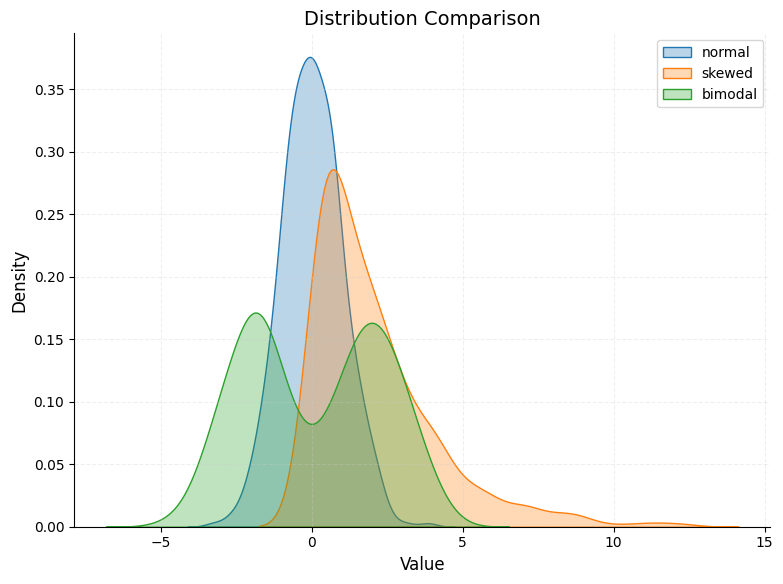

In [10]:
# Density plot comparing distributions
fig, ax = plot_density(
    dist_data,
    columns=['normal', 'skewed', 'bimodal'],
    title='Distribution Comparison',
    fill=True,
)
plt.show()

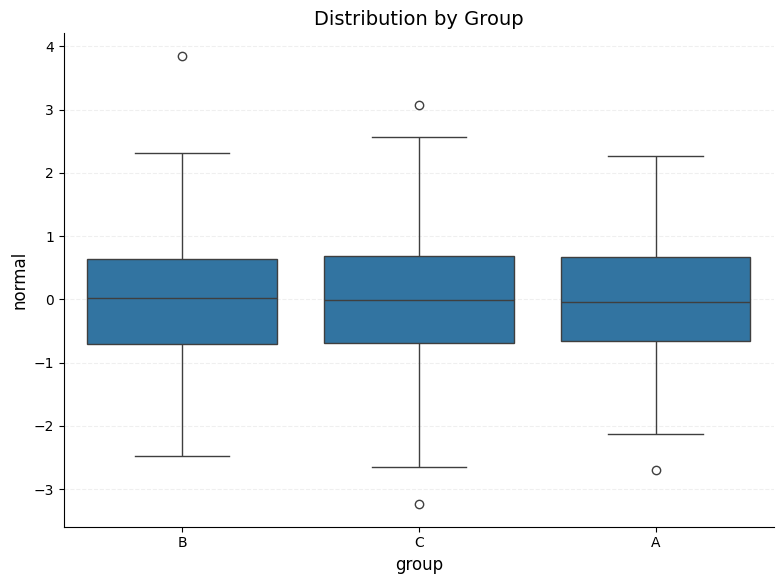

In [11]:
# Box plot by group
fig, ax = plot_boxplot(
    dist_data,
    x='group',
    y='normal',
    title='Distribution by Group',
)
plt.show()

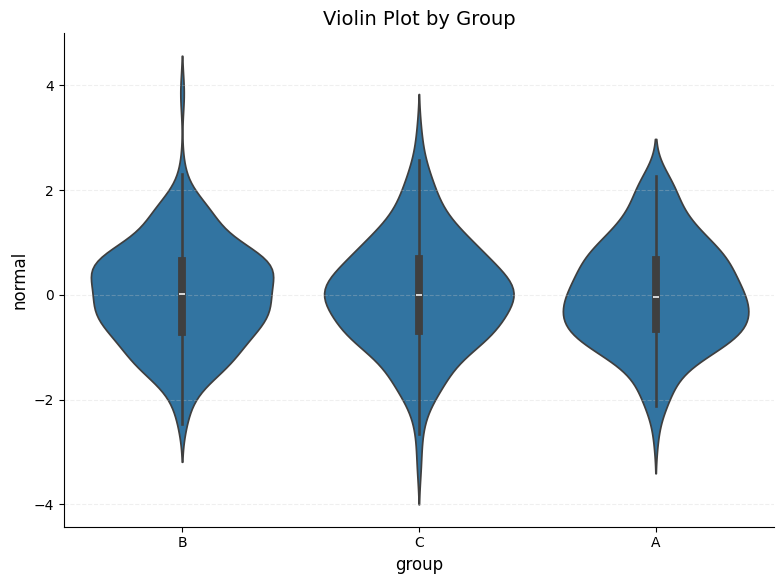

In [12]:
# Violin plot
fig, ax = plot_violin(
    dist_data,
    x='group',
    y='normal',
    title='Violin Plot by Group',
    inner='box',
)
plt.show()

## 6. Time Series Plots

C:\projects\utils\src\ds_utils\plotting\standard.py:399: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  z = np.polyfit(x_numeric, plot_data[col].fillna(method="ffill"), 1)


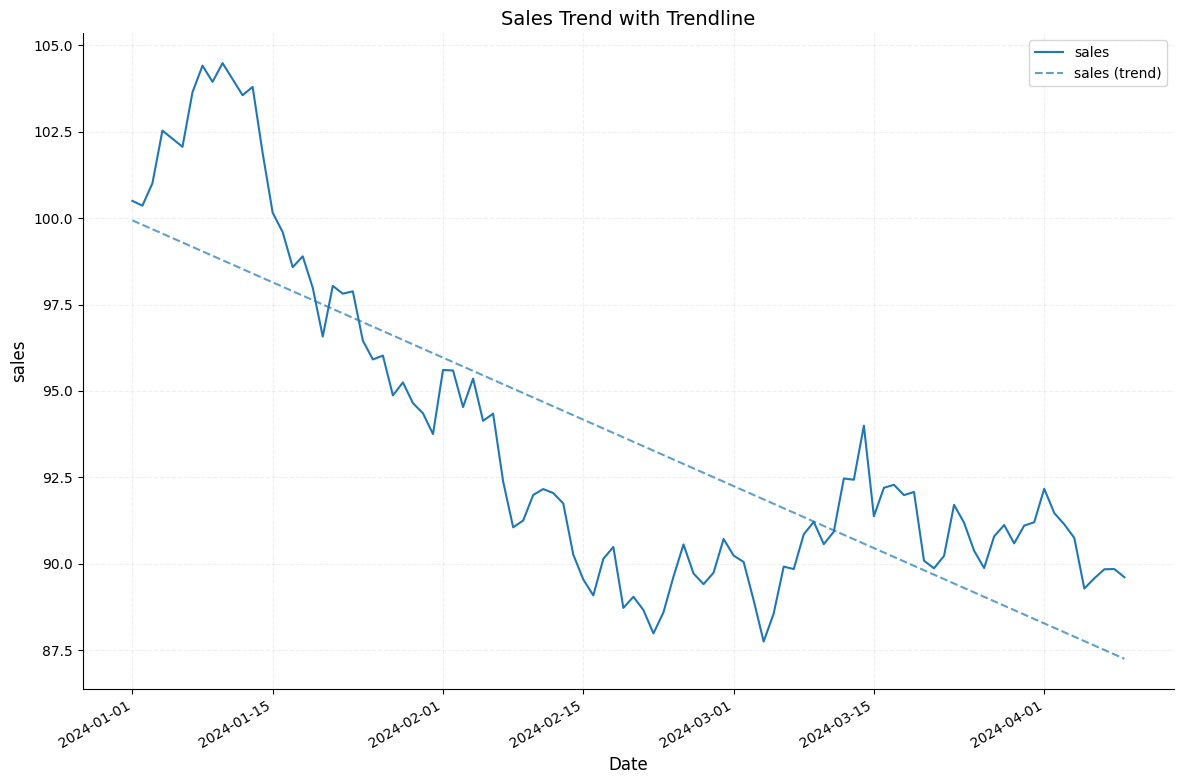

In [13]:
# Time series with trend
fig, ax = plot_time_series(
    ts_data,
    y='sales',
    date_col='date',
    title='Sales Trend with Trendline',
    show_trend=True,
)
plt.show()

## 7. Color Palettes

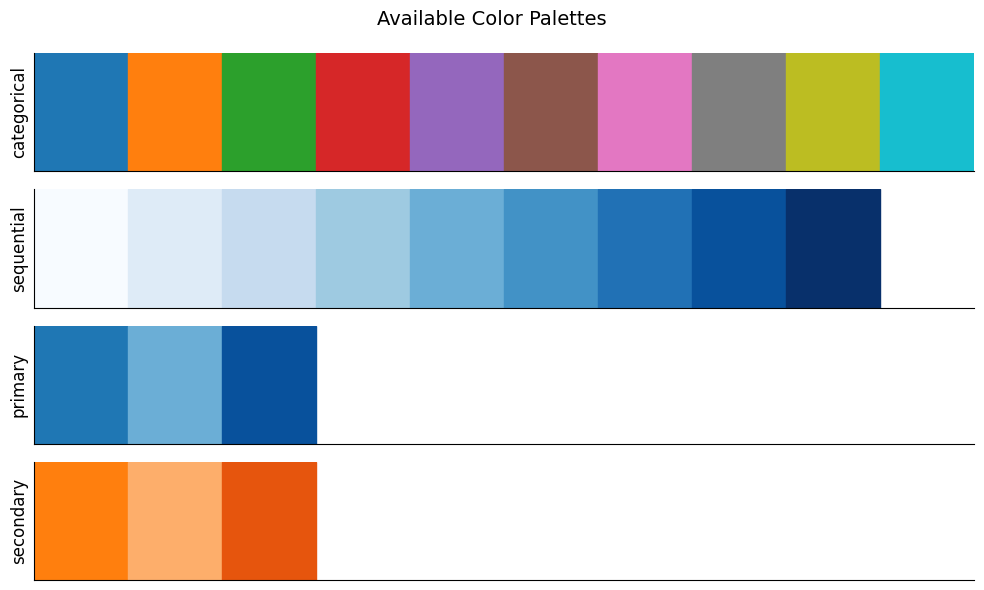

In [14]:
# Display available color palettes
import matplotlib.patches as mpatches

palettes = ['categorical', 'sequential', 'primary', 'secondary']

fig, axes = plt.subplots(len(palettes), 1, figsize=(10, 6))

for ax, palette_name in zip(axes, palettes):
    try:
        colors = get_color_palette(palette_name)
        if isinstance(colors, dict):
            colors = list(colors.values())
        
        for i, color in enumerate(colors[:10]):
            ax.add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color))
        
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 1)
        ax.set_ylabel(palette_name)
        ax.set_xticks([])
        ax.set_yticks([])
    except:
        pass

plt.suptitle('Available Color Palettes', fontsize=14)
plt.tight_layout()
plt.show()

## 8. Saving Plots

Plot created! Uncomment save_plot line to save.


C:\projects\utils\src\ds_utils\plotting\standard.py:305: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, ax=ax, color=colors[0], **plot_kwargs)
C:\projects\utils\src\ds_utils\plotting\standard.py:305: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=data, x=x, y=y, ax=ax, color=colors[0], **plot_kwargs)


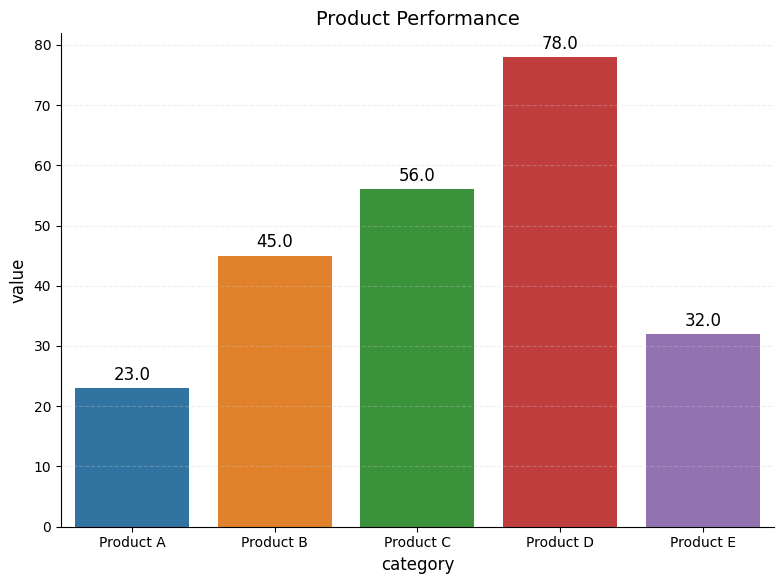

In [15]:
# Create a plot and save it
fig, ax = plot_bar(
    cat_data,
    x='category',
    y='value',
    title='Product Performance',
)

# Uncomment to save:
# save_plot(fig, 'output/product_performance.png', add_logo=False)

print("Plot created! Uncomment save_plot line to save.")
plt.show()